Name: Tahmid Enam Shrestha,
ID= 20-43108-1,
Sec= A

In [25]:
!git clone https://github.com/YoongiKim/CIFAR-10-images.git

fatal: destination path 'CIFAR-10-images' already exists and is not an empty directory.


Git cloning from "https://github.com/YoongiKim/CIFAR-10-images"

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import statistics
import random
from tqdm import tqdm

In [27]:
DATA_DIR = 'CIFAR-10-images/test'
IMG_SIZE = 32
CATEGORIES = [i for i in os.listdir(DATA_DIR)]
print("Types of images from the dataset: ")
print(CATEGORIES)

Types of images from the dataset: 
['horse', 'ship', 'frog', 'cat', 'automobile', 'dog', 'bird', 'deer', 'truck', 'airplane']


Training Dataset Loading

In [28]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(DATA_DIR, c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
            training_data.append([img_gray, class_num])
        except:
            pass

print(len(training_data))

100%|██████████| 1000/1000 [00:00<00:00, 18310.38it/s]

10000


Training Images to Gray-Scale

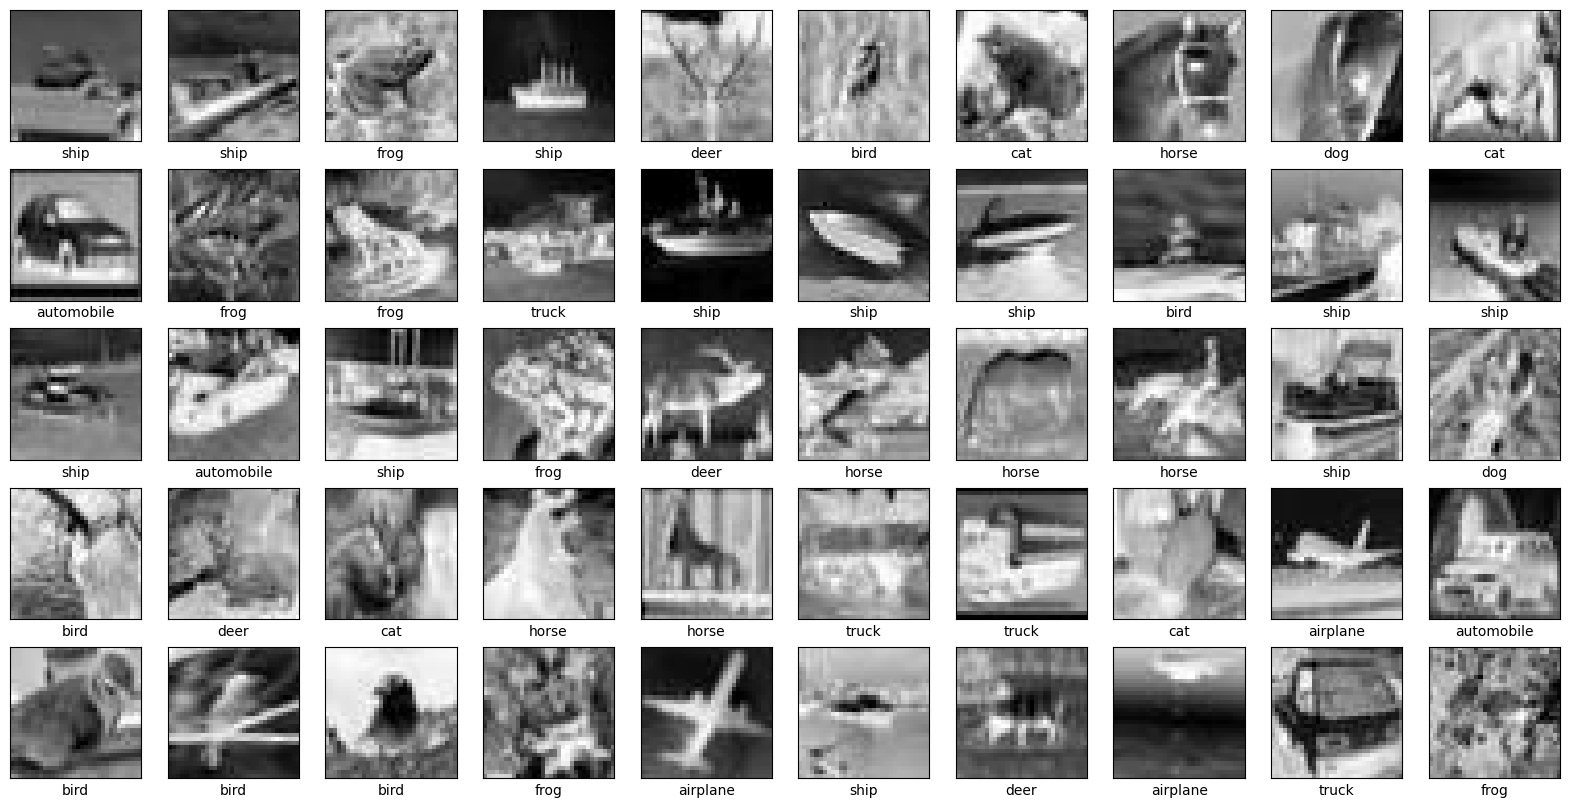

In [29]:
random.shuffle(training_data)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(training_data[i][0], cmap='gray_r')
    plt.xlabel(CATEGORIES[training_data[i][1]])
    plt.xticks([])
    plt.yticks([])
    #plt.xlabel(f"{training_data[i][1]}")
    if i==50:
        break
plt.show()

Dataset Deviding into 5 folds

In [32]:
f0 = training_data[0:500]
f1 = training_data[500:1000]
f2 = training_data[1000:1500]
f3 = training_data[1500:2000]
f4 = training_data[2000:2500]
folds = [f0, f1, f2, f3, f4]

Employing K-NN Algorithom

In [33]:
k_max = 10

def l1_dist(x, y):
    return np.sum(np.abs(x - y))

def l2_dist(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def knn(train, validation, k):
    preds = []
    for v in validation:
        distances = []
        for t in train:
            l2 = l2_dist(v[0], t[0])
            distances.append((l2, t[1]))
        distances.sort(key=lambda x: x[0])
        neighbors = [d[1] for d in distances[:k]]
        counts = np.bincount(neighbors)
        pred = np.argmax(counts)
        preds.append(pred)
    return preds

mean_accuracies_l1 = []
std_accuracies_l1 = []
mean_accuracies_l2 = []
std_accuracies_l2 = []

for k in tqdm(range(1, k_max+1)):
    fold_accuracies_l1 = []
    fold_accuracies_l2 = []

    for i in range(5):
        if i == 0:
            train = f1+f2+f3+f4
            validation = f0
        elif i == 1:
            train = f0+f2+f3+f4
            validation = f1
        elif i == 2:
            train = f1+f0+f3+f4
            validation = f2
        elif i == 3:
            train = f1+f2+f0+f4
            validation = f3
        elif i == 4:
            train = f1+f2+f3+f0
            validation = f4

        acc_l1 = 0
        acc_l2 = 0

        for v in validation:
            l1_dists = []
            l2_dists = []
            for t in train:
                l1 = l1_dist(v[0], t[0])
                l2 = l2_dist(v[0], t[0])
                l1_dists.append((l1, t[1]))
                l2_dists.append((l2, t[1]))
            l1_dists.sort(key=lambda x: x[0])
            l2_dists.sort(key=lambda x: x[0])

            neighbors_l1 = [d[1] for d in l1_dists[:k]]
            counts_l1 = np.bincount(neighbors_l1)
            pred_l1 = np.argmax(counts_l1)

            neighbors_l2 = [d[1] for d in l2_dists[:k]]
            counts_l2 = np.bincount(neighbors_l2)
            pred_l2 = np.argmax(counts_l2)

            if pred_l1 == v[1]:
                acc_l1 += 1
            if pred_l2 == v[1]:
                acc_l2 += 1

        fold_accuracies_l1.append(acc_l1 / len(validation))
        fold_accuracies_l2.append(acc_l2 / len(validation))

    mean_accuracies_l1.append(np.mean(fold_accuracies_l1))
    std_accuracies_l1.append(np.std(fold_accuracies_l1))
    mean_accuracies_l2.append(np.mean(fold_accuracies_l2))
    std_accuracies_l2.append(np.std(fold_accuracies_l2))

avg_accuracies_l1 = []
avg_accuracies_l2 = []

for k in range(1, k_max + 1):
    avg_accuracy_l1 = np.mean(mean_accuracies_l1[k - 1::k_max])
    avg_accuracy_l2 = np.mean(mean_accuracies_l2[k - 1::k_max])
    avg_accuracies_l1.append(avg_accuracy_l1)
    avg_accuracies_l2.append(avg_accuracy_l2)

print("Average Accuracy for L1 Distance:")
for k, accuracy in enumerate(avg_accuracies_l1, 1):
    print(f"k = {k}: {accuracy:.2f}")

print("\nAverage Accuracy for L2 Distance:")
for k, accuracy in enumerate(avg_accuracies_l2, 1):
    print(f"k = {k}: {accuracy:.2f}")



100%|██████████| 10/10 [18:50<00:00, 113.05s/it]

Average Accuracy for L1 Distance:
k = 1: 0.19
k = 2: 0.18
k = 3: 0.20
k = 4: 0.20
k = 5: 0.20
k = 6: 0.20
k = 7: 0.20
k = 8: 0.20
k = 9: 0.20
k = 10: 0.21

Average Accuracy for L2 Distance:
k = 1: 0.16
k = 2: 0.16
k = 3: 0.15
k = 4: 0.16
k = 5: 0.16
k = 6: 0.17
k = 7: 0.17
k = 8: 0.17
k = 9: 0.16
k = 10: 0.16


Ploting K on x axis and accuracy on y axis for both L1 and L2 distances

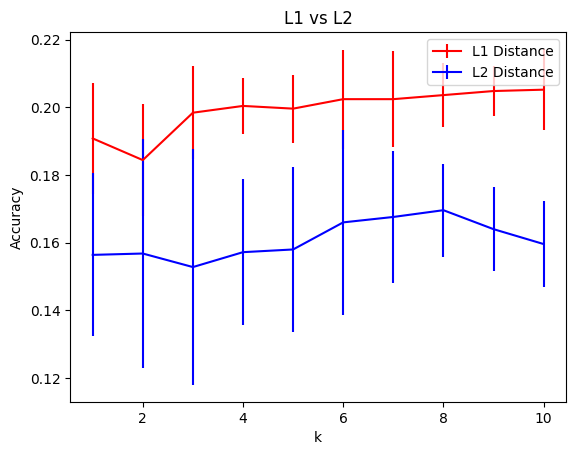

In [34]:
plt.errorbar(range(1, k_max+1), mean_accuracies_l1, yerr=std_accuracies_l1, label="L1 Distance",color="red")
plt.errorbar(range(1, k_max+1), mean_accuracies_l2, yerr=std_accuracies_l2, label="L2 Distance",color="blue")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("L1 vs L2")
plt.legend()
plt.show()

**Discussion:**
The line graph illustrates the accuracy results for two distance metrics, Manhattan (L1) and Euclidean (L2), using 5-fold cross-validation.
Manhattan and Euclidean distances are methods used to measure dissimilarity between data points in a vector space. It is essential to note that Euclidean distance is sensitive to outliers because it squares differences, amplifying the impact of more significant differences. On the other hand, Manhattan distance is less affected by outliers as it sums up the absolute differences. The data used in this analysis is from the CIFAR-10 dataset's "test" folder, containing 10,000 color images of 32x32 pixels. To save processing time, these images have been converted to grayscale and evenly distributed into subfolders, resulting in about 2,000 images per subfolder. Due to time shortest, 500 images are choosen by each subfolder in this assignment.
Regarding the accuracy vs. k graph, The K-nearest neighbors (KNN) algorithm depends on a distance metric (Manhattan or Euclidean) to identify the k-nearest neighbors for a given data point. The graph shows how accuracy values change as k varies from 0 to 25.
For Manhattan (L1) accuracy, the graph indicates fluctuations in accuracy as k increases from 0 to 10, followed by a descending trend, reaching its lowest point at k=2 (accuracy of 0.18). However, the highest accuracy for L1 is at k=10, with a value of 0.22.
In contrast, Euclidean (L2) accuracy initially decreases, has a sudden peak around k=4.5, and gradually declines from k=8 to 10. However, there is a steady increase in accuracy, reaching a maximum of 0.17 at k=8. Notably, L2 has its lowest accuracy at the same k-value (2.5) as L1. Notably, the accuracy of L2 decreases more significantly than L1 as k increases.
This analysis underscores the distinctive behavior of these two distance metrics in KNN, their sensitivity to outliers, and how the choice of k affects accuracy differently for each metric.

**Limitations:**
The primary constraint is related to the choice of distance metric.The effectiveness of the K-nearest neighbors (KNN) algorithm diligently depends on the selection of an suitable distance metric. When comparing Manhattan and Euclidean distances, it's observed that the Euclidean distance metric can yield better performance for specific datasets, achieving the highest accuracy.
KNN's performance is influenced by the number of dimensions, and as the dimensionality increases, its performance tends to degrade.
The performance of KNN is also sensitive to the scaling of features, which can introduce bias into the results. Normalization can help alleviate this issue.
KNN is susceptible to noisy data and outliers. Addressing noisy data with robust distance metrics is essential to obtain the desired outcomes.
For large datasets, particularly in high-dimensional spaces, KNN can be computationally intensive, which can lead to longer processing times.

In [40]:
# Function to get the top K predictions for a given test image
def get_top_predictions(test_image, k):
    l1_dists = []
    l2_dists = []
    for t in training_data:
        l1 = l1_dist(test_image, t[0])
        l2 = l2_dist(test_image, t[0])
        l1_dists.append((l1, t[1]))
        l2_dists.append((l2, t[1]))
    l1_dists.sort(key=lambda x: x[0])
    l2_dists.sort(key=lambda x: x[0])

    neighbors_l1 = [d[1] for d in l1_dists[:k]]
    neighbors_l2 = [d[1] for d in l2_dists[:k]]

    return neighbors_l1, neighbors_l2

# Function to get label names for predictions
def get_label_names(neighbors, category_names):
    label_names = [category_names[label] for label in neighbors]
    return label_names

# Function to display the top K predictions for a given test image
def display_top_predictions(test_img, true_label, neighbors_l1, neighbors_l2):
    print(f"True Label: {CATEGORIES[true_label]}")
    print("Top 5 Predictions for L1 Distance:")
    l1_label_names = get_label_names(neighbors_l1, CATEGORIES)
    for i, label_name in enumerate(l1_label_names[:5], 1):
        print(f"Top {i}: {label_name}")

    print("Top 5 Predictions for L2 Distance:")
    l2_label_names = get_label_names(neighbors_l2, CATEGORIES)
    for i, label_name in enumerate(l2_label_names[:5], 1):
        print(f"Top {i}: {label_name}")
    print("\n")

# Display the top 5 predictions for a few test images
num_test_images = 5  # Change this to the number of test images you want to display
k_neighbors = 5  # Number of neighbors to consider

for i in range(num_test_images):
    test_img, true_label = test_data[i]
    neighbors_l1, neighbors_l2 = get_top_predictions(test_img, k_neighbors)

    display_top_predictions(test_img, true_label, neighbors_l1, neighbors_l2)


True Label: horse
Top 5 Predictions for L1 Distance:
Top 1: horse
Top 2: deer
Top 3: airplane
Top 4: deer
Top 5: frog
Top 5 Predictions for L2 Distance:
Top 1: horse
Top 2: dog
Top 3: airplane
Top 4: deer
Top 5: bird


True Label: horse
Top 5 Predictions for L1 Distance:
Top 1: horse
Top 2: ship
Top 3: dog
Top 4: airplane
Top 5: ship
Top 5 Predictions for L2 Distance:
Top 1: horse
Top 2: ship
Top 3: ship
Top 4: ship
Top 5: dog


True Label: horse
Top 5 Predictions for L1 Distance:
Top 1: horse
Top 2: truck
Top 3: horse
Top 4: frog
Top 5: truck
Top 5 Predictions for L2 Distance:
Top 1: horse
Top 2: truck
Top 3: deer
Top 4: ship
Top 5: deer


True Label: horse
Top 5 Predictions for L1 Distance:
Top 1: horse
Top 2: airplane
Top 3: airplane
Top 4: airplane
Top 5: dog
Top 5 Predictions for L2 Distance:
Top 1: horse
Top 2: ship
Top 3: cat
Top 4: ship
Top 5: automobile


True Label: horse
Top 5 Predictions for L1 Distance:
Top 1: horse
Top 2: cat
Top 3: cat
Top 4: deer
Top 5: ship
Top 5 Predi